# Table of Contents

* [Import Python Packages and Libraries](#Import-Python-Packages-and-Libraries)

* [Import Data](#Import-Data)

* [Clean Data](#Clean-Data)

* [United States Analysis](#United-States-Analysis)
    - [Cumulative Cases Per State](#Cumulative-Cases-Per-State)
    - [Cumulative Number of Deaths Per State](#Cumulative-Number-of-Deaths-Per-State)
    - [Testing Time Series](#Testing-Time-Series)
    - [Hospitalization Time Series](#Hospitalization-Time-Series)
    - [Active Cases Per State](#Active-Cases-Per-State)
    - [Map of Cumulative log10(Deaths)](#Map-of-Cumulative-log10(Deaths))
    
    
* [World Analysis](#World-Analysis)

## Import Python Packages and Libraries

In [120]:
import io
import requests

import bokeh
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns


import folium

In [121]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

## Import Data 

In [174]:
x = pd.read_html(
    'https://docs.google.com/'
    'spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/'
    'pubhtml#', header=1, index_col=0)

## Clean Data

In [188]:
df = x[3].copy()

cols = ['Date', 'State', 'Positive',
        'Negative', 'Pending', 'Hospitalized Currently', 
        'Hospitalized Cumulative', 'In ICU Currently', 'In ICU Cumulative',
        'On Ventilator Currently', 'On Ventilator Cumulitve',
        'Recovered', 'Deaths', 'Data Quality Grade', 'Latest Update ET'
       ]
df.columns = cols
df = df.reset_index(drop=True).dropna(how='all')
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d' )
df = df.sort_values('Date')

df_recent =  df.groupby('State', as_index=False).last()
df_recent.fillna(0, inplace=True)
df_recent['Active Cases'] = df_recent['Positive']-df_recent['Recovered']-df_recent['Deaths']

## United States Analysis

### Cumulative Cases Per State

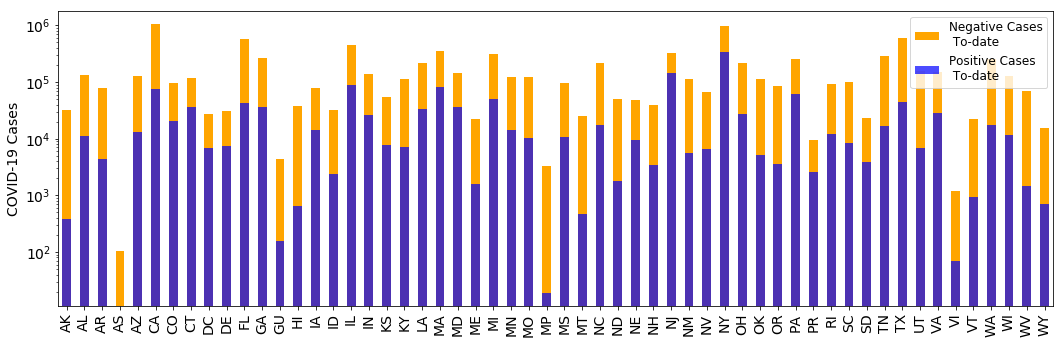

In [203]:
fig, ax = plt.subplots(figsize=(15,5))

df_recent['Negative'].plot(ax=ax, kind='bar', x='State', 
                           color='orange',
                           label='Negative Cases\n To-date',
                          )

df_recent['Positive'].plot(ax=ax, kind='bar', x='State',
                          color='blue', 
                           label='Positive Cases \n To-date',
                           alpha=.7
                          )

ax.set_xticklabels(df_recent['State'].values)
ax.set_ylabel('COVID-19 Cases')
ax. semilogy()

plt.legend(prop={'size':12})
plt.tight_layout()

### Cumulative Number of Deaths Per State

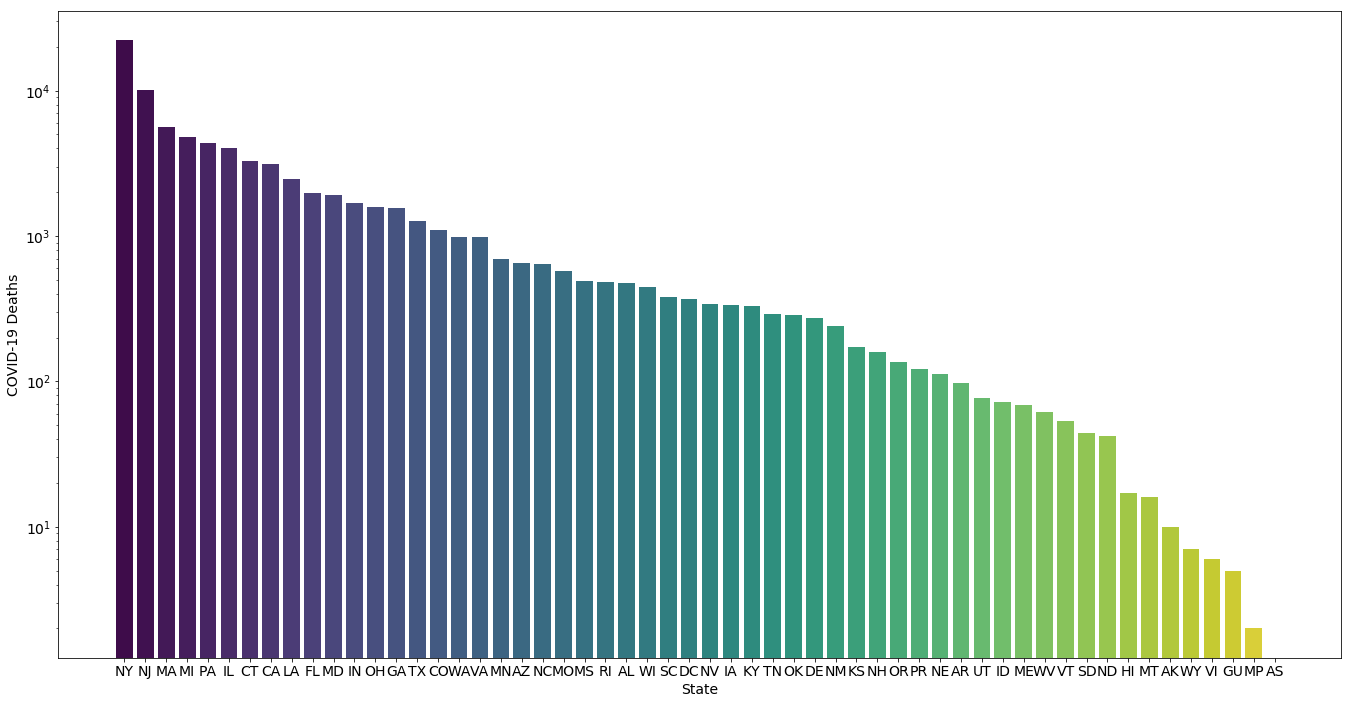

In [169]:
df_desc_recent = df_recent.sort_values(by='Deaths', ascending=False)

fig, ax = plt.subplots(figsize=(19, 10))
sns.barplot(x=df_desc_recent['State'],
            y=df_desc_recent['Deaths'],
           palette=sns.color_palette(
               plt.get_cmap('viridis_r')(np.linspace(1,0,len(df_desc_recent)))))
ax.set_ylabel(r'COVID-19 Deaths')

plt.semilogy()
plt.tight_layout()

### Testing Time Series

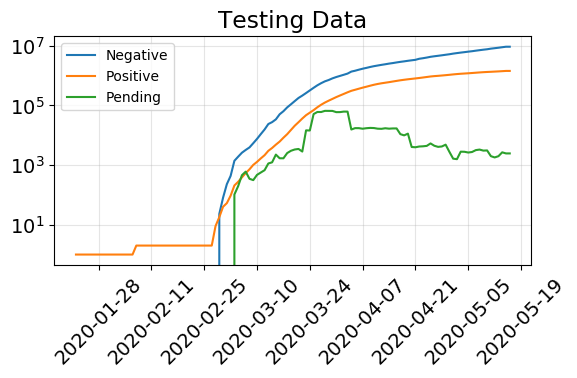

In [170]:
xtickdates = pd.to_datetime('2020-02-01 2020-03-01 2020-04-01 2020-05-01'.split())

fig, ax = plt.subplots(dpi=100)
# dfs.plot(ax=ax, x='Date', y='Negative', )
# dfs.plot(ax=ax, x='Date', y='Positive', )
# dfs.plot(ax=ax, x='Date', y='Pending', )
ax.plot(dfs.Date, dfs.Negative, label='Negative')
ax.plot(dfs.Date, dfs.Positive, label='Positive')
ax.plot(dfs.Date, dfs.Pending, label='Pending')
ax.legend( prop={'size': 10})
ax.set_title(r'Testing Data')
plt.xticks(rotation=45)
plt.grid(alpha=.33)
ax.semilogy()
plt.tight_layout()
#ax.set_xticks(list(n_days))

### Hospitalization Time Series

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

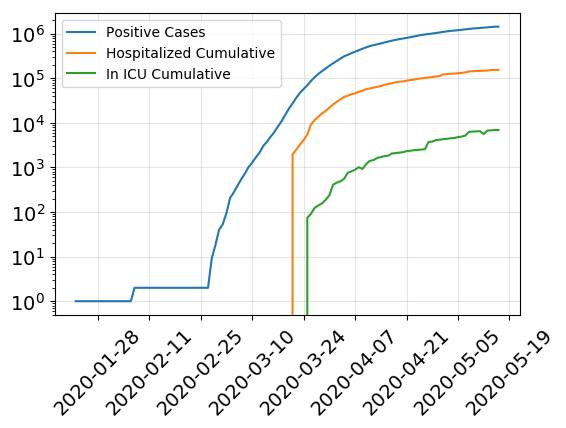

In [205]:
dfs = df.groupby('Date', as_index=False).sum()

fig, ax = plt.subplots(dpi=100)
# dfs.plot(ax=ax, x='Date', y='Negative', )
# dfs.plot(ax=ax, x='Date', y='Positive', )
# dfs.plot(ax=ax, x='Date', y='Pending', )
ax.plot(dfs.Date, dfs['Positive'], label='Positive Cases')
ax.plot(dfs.Date, dfs['Hospitalized Cumulative'], label='Hospitalized Cumulative')
ax.plot(dfs.Date, dfs['In ICU Cumulative'], label='In ICU Cumulative')


ax.legend(loc='upper left', prop={'size': 10})
plt.xticks(rotation=45)
plt.grid(alpha=.33)
ax.semilogy()
plt.tight_layout


### Active Cases Per State

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

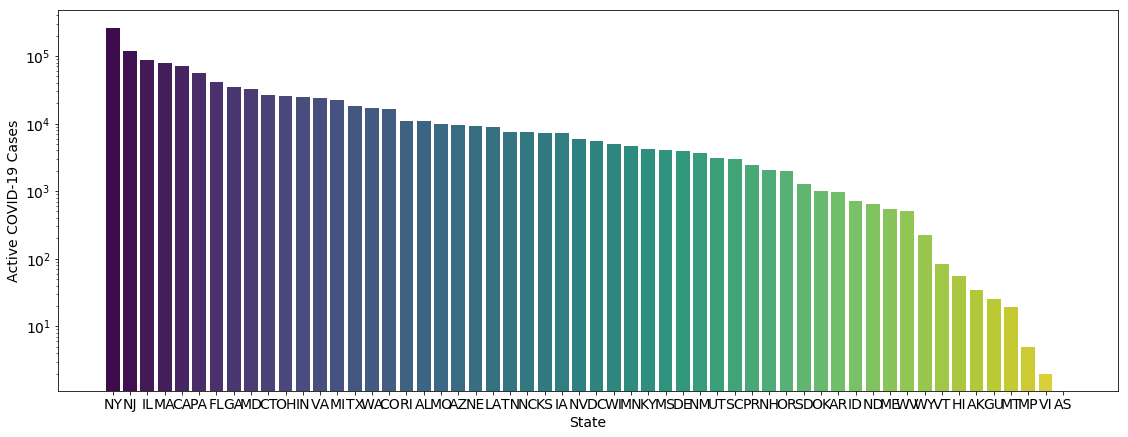

In [211]:
df_active = df_recent.sort_values(by='Active Cases', ascending=False)

fig, ax = plt.subplots(figsize=(19, 7))

sns.barplot(x=df_active['State'], y=df_active['Active Cases'], 
           palette=sns.color_palette(
               plt.get_cmap('viridis_r')(np.linspace(1,0,len(df_desc_recent)))))

ax.set_ylabel('Active COVID-19 Cases')
ax.semilogy()
plt.tight_layout


### Map of Cumulative log10(Deaths)

In [208]:
m = folium.Map(location=[40, -102], zoom_start=3)


folium.Choropleth(
    geo_data='data/us-states.json',
    data=df_map,
    columns=['State', 'log10Deaths'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='COVID-19 log10(Deaths)',
    reset=True
).add_to(m)
m

## World Analysis